In [1]:
## functions
from data_processing import *

## Data preprocessing and analysis
##### 1. Read data
##### 2. Deduplicate
##### 3. Delete text in brackets
##### 4. Leave only basic punctuation
##### 5. Drop non-printable signs
##### 6. Delete empty spaces
##### 7. Drop too long\too short sentences
##### 8. Drop sentences with high non-word signs ratio
##### 9. Number of sentences per dataset
##### 10. Word analysis
##### 11. Number of unique words
##### 12. Merge datasets and append labels

#### 1. Read data
Datafiles with different sentences are in a slightly different format so we want to unify them, so each is a list of sentences.

In [2]:
pl = unify_structure(LANG = 'PL')

In [3]:
print(pl.keys())

dict_keys(['biased', 'reviewed', 'unbiased', 'featured'])


In [4]:
for subset_name, subset in pl.items():
    print(subset_name.upper())
    print(subset[:3])

BIASED
['alfred jodl ( ur . 10 maja 1890 w wrzburgu , stracony 16 października 1946 w norymberdze ) niemiecki dowódca wojskowy z czasów ii wojny światowej w stopniu generała pułkownika ( generaloberst ) ; zbrodniarz wojenny .', 'w 1986 w związku z szeroką kampanią międzynarodowego protestu przeciw apartheidowi ( m.in . koncerty rockowe i pikiety pod placówkami dyplomatycznymi ) i pod naciskiem opinii publicznej rządy stanów zjednoczonych i wielkiej brytanii nałożyły , aczkolwiek niechętnie , na republikę południowej afryki sankcje ekonomiczne w proteście przeciwko prowadzonej przez jej rząd polityce rasowej ( obydwa kraje czerpały ogromne korzyści z bogactw naturalnych i strategicznego położenia rpa traktując ten kraj jako swojego sojusznika w zimnej wojnie ) .', 'archimedes z syrakuz ( gr . archimedes ho syrakosios ; ok. 287-212 p.n.e . ) wybitny grecki filozof przyrody i matematyk , urodzony i zmarły w syrakuzach ; wykształcenie zdobył w aleksandrii .']
REVIEWED
['alfred jodl ( ur . 

In [5]:
# Adding sentences with deceiving phrases to the Polish version
deceiving = read_data('dataPL/deceiving_sentences')
print("Added deceiving sentences:", len(deceiving))

print('\nEXAMPLES:')
for i in range(5):
    print(random.choice(deceiving), '\n')
    
pl['biased'] = pl['biased'] + deceiving

Added deceiving sentences: 579

EXAMPLES:
w literaturze definiowane często jako pojęcie pełni władzy książęcej , która nie znała żadnych ścisłych granic . 

w tłumaczeniu na język polski poprawna wydaje się nazwa : amerykański pies eskimoski ; ze względu jednak na brak uznania rasy przez fci nie występuje ona w oficjalnej polskiej terminologii kynologicznej . 

paprocki . 

mocno przyczynił się do tych sukcesów , a fani uznali go za najbardziej lubianego gracza drużyny . 

zdobył mont blanc ( 4810 m n.p.m . ) , który należy do korony europy i , jako najwyższy szczyt europy ( według geografów ) , do korony ziemi . 



#### 2. Deduplicate
Drop duplicates within biased and reviewed datasets.

In [6]:
# Deduplicate sentences within biased and reviewed datasets
print('POLISH:')
pl = drop_biased_dups(pl)

POLISH:
Biased deleted: 113
Reviewed deleted: 97


##### Drop duplicates between reviewed and biased
They appear if the sentence was corrected more than once.
I am going to keep first version of biased sentence and the newest version in case of reviewed sentence.
I will be done be creating for loop between sentence and its neighbours within a set and calculating BLUE score between them. Too simillar sentences will be dropped. It is sufficient to check for duplicates only neigbours of a sentence as sentences from one article (but different reviews) are close to eachother in the dataset.

| Biased | Reviewed |
| --- | --- |
| rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków . | **według badań statystycznych** rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków . |
|**według badań statystycznych** rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków .|**według badań statystycznych przeprowadzonych w usa** rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków .|

<br>
After pre-processing - <b>first version of sentence in 'biased' and last version of sentence in 'reviewed' are kept.</b>

| Biased | Reviewed |
| --- | --- |
| rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków . | **według badań statystycznych przeprowadzonych w usa** rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków  |


In [7]:
# Present examples
biased_dups_pl, biased_indices_pl = similar_sent(pl['biased'], 50)
reviewed_dups_pl, reviewed_indices_pl = similar_sent(pl['reviewed'], 50)

print('TOO SIMILAR SENTECES IN BIASED SUBSET')
for pair in biased_dups_pl[:3]:
    print(pair[0])
    print(pair[1])
    print('\n')

TOO SIMILAR SENTECES IN BIASED SUBSET
rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków .
według badań statystycznych rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków .


opublikowany w 2008 roku w contraception 20-letni przegląd piśmiennictwa wykazał , że w badaniach , które autorzy przeglądu uznali za poprawnie wykonane , nie było zależności pomiędzy dokonaniem aborcji a zdrowiem psychicznym po wielu latach od aborcji ( lub zależność była mała ) ; równocześnie badania o złej jakości metodologicznej często postulowały taką zależność .
opublikowany w 2008 roku w contraception 20-letni przegląd piśmiennictwa wykazał , że w badaniach , które autorzy przeglądu uznali za poprawnie wykonane , nie było zależności pomiędzy dokonaniem aborcji a zdrowiem psychicznym po wielu latach od aborcji ( lub zależność była mała ) ; równocześnie badania o złej jakości metodologicz

In [8]:
# drop duplicates
print('Biased POLISH')
pl = clean_biased(pl, biased_indices_pl)
print('\nReviewed POLISH')
pl = clean_reviewed(pl, reviewed_indices_pl)

Biased POLISH
Number of duplicates: 336

Reviewed POLISH
Number of duplicates: 332


#### 3. Delete text in brackets
Delete text in brackets that in most cases is just additional information like dates, names etc. that is rather irrelevant for bias detection but can add noise to the data and hamper classification

In [9]:
print('POLISH:')
in_brackets_examples(pl)

POLISH:
BIASED
( ur . 10 maja 1890 w wrzburgu , stracony 16 października 1946 w norymberdze )
( m.in . koncerty rockowe i pikiety pod placówkami dyplomatycznymi )
( gr . archimedes ho syrakosios ; ok. 287-212 p.n.e . )
( ur . 7 listopada 1913 w mondovi , zm . 4 stycznia 1960 w villeblevin )
( spółgłoska nosowa miękkopodniebienna )
( - a- , bez + gnsis , wiedzy ; od gnostycyzmu )
REVIEWED
( ur . 10 maja 1890 w wrzburgu , stracony 16 października 1946 w norymberdze )
( m.in . koncerty rockowe i pikiety pod placówkami dyplomatycznymi )
( gr . archimedes ho syrakosios ; ok. 287-212 p.n.e . )
( ur . 7 listopada 1913 w mondovi w algierii , zm . 4 stycznia 1960 w villeblevin )
( - a- , bez + gnsis , wiedzy ; od gnostycyzmu )
( poza katolikami i luteranami )
UNBIASED
( gnstos `` nieznany , niepoznawalny '' )
( np . poprzez akt apostazji )
( 2005 )
( non-denominational )
( tzw . `` obrońcy życia '' , ruchy pro-life )
( zatrzymanie akcji serca w rozkurczu )
FEATURED
(ur. 31 lipca 1891 w suwałkac

In [10]:
pl = delete_in_brackets(pl)

#### 4. Leave only basic punctuation

In [11]:
pl_punc = check_punc(pl)

print('Punctuation POLISH')
print(pl_punc)

Punctuation POLISH
{',': 50513, '.': 46888, '-': 3001, '``': 2824, "''": 2721, ':': 1995, ';': 1189, '(': 655, '"': 539, '/': 536, "'": 445, '[': 401, '%': 313, ')': 290, '?': 233, '&': 202, '...': 162, '!': 120, '--': 112, '+': 94, '=': 93, '>': 77, '<': 66, '{': 38, '),': 37, '#': 36, '}': 36, '*': 34, '[...]': 31, ']': 28, '..': 22, ').': 22, '|': 17, '`': 10, '....': 10, '$': 9, '~': 7, '//': 5, '].': 5, '],': 4, '$.': 4, '[...].': 4, "/'": 4, '.???': 3, '@': 2, '/,': 2, '...;': 2, '..."': 2, '[...],': 2, '~~~~': 1, "'-": 1, '[?': 1, '(?': 1, '[..]': 1, '):': 1, ':]': 1, '*-': 1, '/.': 1, '"...': 1, '-:': 1, '***': 1, '(=': 1, '**': 1, '(=?': 1, '(<': 1, '.</': 1, '...,': 1, '*.': 1, '[?]': 1}


In [12]:
# Leave only:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
print('Deleted in POLISH:\n')
pl = remove_punc(pl)

Deleted in POLISH:

Deleted signs: dict_keys(['//', '``', "''", '...', '..', '--', '....', '~~~~', "'-", '[?', '.???', '(?', '[...]', '[..]', '):', '],', '].', '$.', '[...].', '/,', "/'", ':]', '*-', '...;', '/.', '..."', '"...', '[...],', '-:', '***', '(=', '**', '(=?', '(<', '.</', '...,', '*.', '[?]'])


#### 5. Non-printable signs
Signs that cause errors while vectorizing.

In [14]:
np_pl = non_printable(pl)

print('POLISH:')
print(np_pl)

POLISH:
{'é': 1501, 'о': 1037, 'е': 903, 'ö': 866, 'а': 858, 'ü': 779, 'ä': 761, 'т': 741, 'и': 678, 'н': 662, 'с': 507, 'к': 438, 'р': 433, 'α': 416, 'л': 402, 'в': 402, 'á': 333, 'м': 329, 'д': 318, 'у': 310, 'ь': 309, 'è': 268, 'я': 237, 'п': 233, 'й': 233, 'ы': 226, 'б': 226, 'ч': 208, 'ο': 200, '²': 188, 'ι': 183, 'ε': 169, 'ō': 167, 'з': 163, 'š': 156, 'ς': 151, 'β': 147, 'ç': 146, 'г': 146, 'ə': 146, 'ν': 146, 'č': 141, 'ă': 135, 'í': 129, 'ш': 121, 'ø': 117, 'ρ': 117, 'κ': 116, 'τ': 116, 'ж': 114, 'ß': 113, 'υ': 111, '³': 108, 'μ': 107, 'λ': 98, 'å': 96, 'σ': 96, 'π': 87, 'ː': 79, 'ю': 79, 'ɪ': 78, 'х': 76, 'ñ': 71, 'ô': 66, 'η': 63, 'ā': 59, 'ū': 58, 'δ': 57, 'ё': 55, 'ц': 53, 'ω': 52, 'ˈ': 51, 'θ': 45, 'φ': 45, 'ú': 41, 'γ': 41, 'ž': 40, 'ë': 39, 'æ': 38, 'ʊ': 37, 'â': 35, 'à': 35, 'ê': 31, 'э': 29, 'ð': 26, 'щ': 25, 'χ': 24, 'і': 22, 'î': 21, 'ã': 20, 'ý': 20, 'ř': 20, 'ɑ': 19, 'µ': 19, 'ọ': 18, 'ʾ': 18, 'ɔ': 18, 'ț': 18, 'ɛ': 18, 'ό': 18, 'ф': 17, 'ī': 17, 'ί': 17, 'ï': 16,

In [15]:
pl = replace_signs(pl, to_drop = np_pl)

#### 6. Delete empty spaces

In [16]:
pl = delete_empty_spaces(pl)

#### 7. Drop too long\too short sentences
Analyse distributions of sentences' lengths.

In [17]:
print('POLISH')
# where short and long threshold stands for 'how many tokens short and long sentences have'
lengths_pl, shorts_pl, longs_pl = count_sent_lengths(pl, short_threshold = 2, long_threshold = 100) 

POLISH
biased | minimum length: 1 max_length: 282
reviewed | minimum length: 1 max_length: 280
unbiased | minimum length: 1 max_length: 180
featured | minimum length: 1 max_length: 226


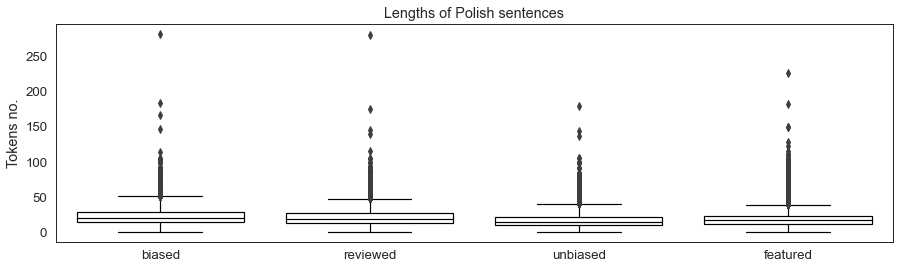

In [18]:
plot_lengths(lengths_pl, title = "Lengths of Polish sentences")

In [19]:
# Too long sentences
for i in range(3):
    print(longs_pl[i], '\n')

pakt o przyjaźni miedzy hitlerowską iii rzeszą i frankistowską hiszpanią przewidywał m.in . : konsultacje jeśli chodzi o interesy międzynarodowe , wzajemne poparcie w razie konfliktow dyplomatycznych z jakąś stroną trzecią , zobowiązanie do niezawierania żadnych umów szkodzących partnerowi , współpracę wojskową a w końcowych artykułach strony zobowiązywały się do rozwijania wzajemnych stosunków gospodarczych i kulturalnych jak na ironię w haśle o franco stoi że w 1939 r postawiono tamę faszyzmowi a koszel stwierdza że podpisanie porozumień było szczytowym punktem zblizenia hiszpanii z mocarstwami osi w 1939 i cytuje książkę batowskiego europa zmierza ku przepaści : hiszpania bez formalnego sojuszu stawała się najbliższym współpracownikiem politycznym mocarstw osi porozumień na nalegania hiszpanów nie opublikowano . 

możliwe przyczyny powołania komitetu sądowniczego : cudzołóstwo , rozpusta , homoseksualizm , nawyk oglądania pornografii , bluźnierstwo , pijaństwo , używanie wyrobów tyt

In [20]:
# Too short sentences
for i in range(5):
    print(shorts_pl[i], '\n')

otóż pytanie 

netscape browser 

 

dialekt śląski 

splot jądrowy 



Too long or too short sentences may be result of poor sentence tokenization. If the sentence containing bias is too long it also may introduce only noise, as there will be a lot of unbiased text and only one biased fragment.

In [21]:
print('POLISH')
pl = clean_by_length(pl, 2, 70)

POLISH
biased dropped sentences 65
reviewed dropped sentences 47
unbiased dropped sentences 116
featured dropped sentences 154


POLISH
biased | minimum length: 3 max_length: 70
reviewed | minimum length: 3 max_length: 70
unbiased | minimum length: 3 max_length: 70
featured | minimum length: 3 max_length: 70


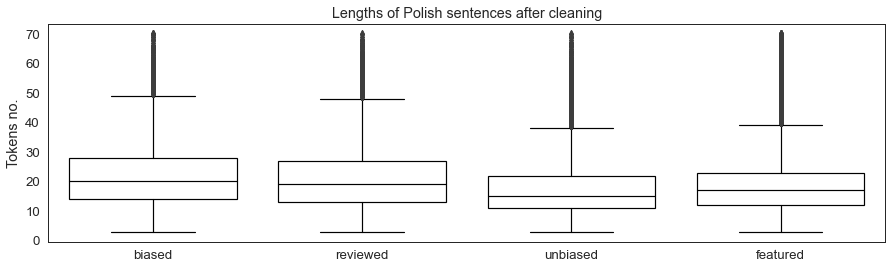

In [22]:
print('POLISH')
lengths_pl, _, _ = count_sent_lengths(pl, short_threshold = 2, long_threshold = 100)
plot_lengths(lengths_pl, title = "Lengths of Polish sentences after cleaning")

#### 8. Sentences with high non-word signs ratio

In [23]:
pl_nw_ratios, high_ratios_pl = count_nw_ratios(pl)

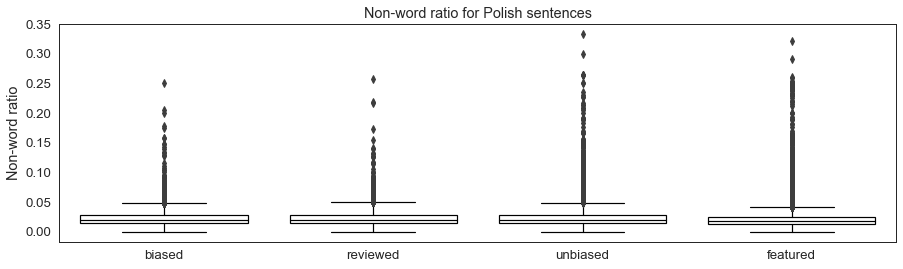

In [24]:
wnw_distributions(pl_nw_ratios, title = 'Non-word ratio for Polish sentences')

In [25]:
print("SENTENCES WITH NON-WORD RATIO HIGHER THAN SET THRESHOLD = 0.12\n")

print("Noisy sentences POLISH:")
print(random.sample(high_ratios_pl, 10))

SENTENCES WITH NON-WORD RATIO HIGHER THAN SET THRESHOLD = 0.12

Noisy sentences POLISH:
['w półfinale pokonała anastasiję myskinę 2:6, 6:2, 6:2, a w finale, serenę williams 4:6, 6:2, 6:4.', 'wyniki meczu: sesja i: 67-59, 89-0, 64-35, 71-64, 62-8, 86-6, 67-39, 6-110, 122-0 sesja ii: 8-117, 36-72, 75-38, 6-67, 72-48.', 'głoska // w rp współcześnie brzmi raczej jak /a/ , a /e/ bardziej jak //.', 'wyniki spotkania: sesja i: 1-64, 107-0, 51-75, 107-14, 90-0, 64-56, 17-78, 87-0, 78-0 sesja ii: 86-0, 87-24, 39-71, 80-44, 81-0.', '< a.j. > < ? > 14:55 , 11 sty 2007', '5-43; 6,1-56; 7,1-37; 8,1-38; 9,1-50; 10,1-52; 11,1-33; 12,1-38; 13,16-29; 14,4-72; 15,1-47; 16,1-12 .wszyscy badacze są zgodni, że kodeks zasadniczo reprezentuje bizantyńską tradycję tekstualną.', 'wyniki meczu: sesja i: 77-30, 1-101, 0-70, 24-90, 83-8, 69-0, 0-84, 52-64, 96-1 sesja ii: 70-25, 121-0, 65-23, 75-18, 41-63, 114-0, 73-1.', "v ' = o & times v", '83.142.201.60 11 : 59 , 3 lis 2006', 'plozja, inaczej wybuch, to dość gw

In [26]:
print('POLISH')
pl = clean_nw_ratios(pl, ratio_threshold = 0.12)

POLISH
BIASED dropped: 15
REVIEWED dropped: 12
UNBIASED dropped: 76
FEATURED dropped: 130


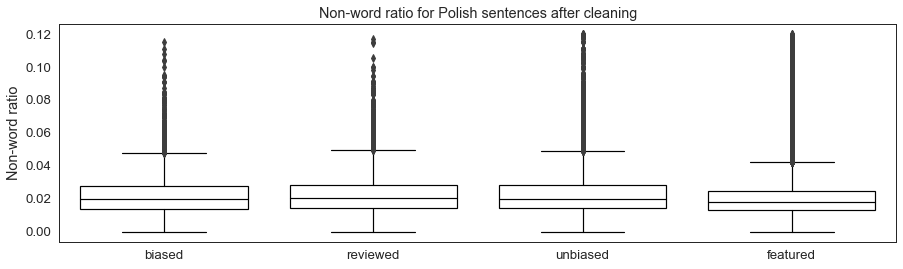

In [27]:
pl_nw_ratios, _ = count_nw_ratios(pl)
wnw_distributions(pl_nw_ratios, title = 'Non-word ratio for Polish sentences after cleaning')

#### 9. Number of sentences per dataset

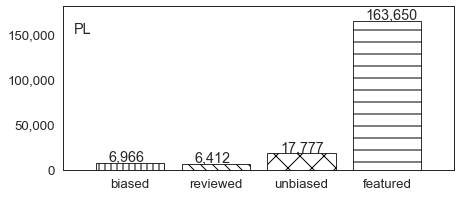

In [28]:
dist_plot(pl, 'PL')

#### 10. Word analysis

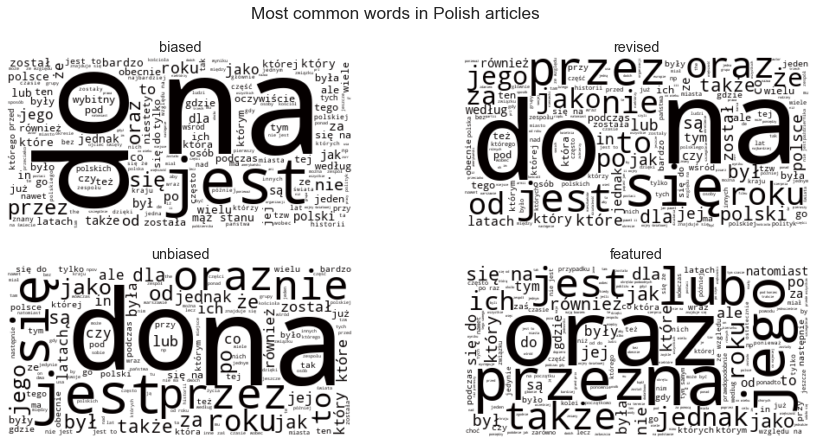

In [29]:
stopwords_pl = open('polish_stopwords.txt', 'r', encoding = 'utf8').read()
plot_wordclouds(pl, 'PL', title = 'Most common words in Polish articles', stopwords = stopwords_pl)

#### 11. Number of unique words

In [30]:
word_count_pl = count_words(pl)

In [31]:
print('There is {:,} unique words in Polish sets'.format(len(word_count_pl)))

There is 341,739 unique words in Polish sets


In [32]:
print('Percentiles of word frequencies for POLISH:')
count_percentiles(word_count_pl)

Percentiles of word frequencies for POLISH:
10 % of all words appear less often than 1 time\s in text
25 % of all words appear less often than 1 time\s in text
50 % of all words appear less often than 1 time\s in text
75 % of all words appear less often than 3 time\s in text
90 % of all words appear less often than 11 time\s in text
95 % of all words appear less often than 23 time\s in text
99 % of all words appear less often than 111 time\s in text


#### 12. Merge datasets
Merge dataset and append labels. 

**Label 1: biased** = biased  <br>
**Label 0: unbiased** = reviewed + unbiased + featured

In [33]:
pl = merge_datasets(pl)

POLISH:
Positive label: 4.0%
Positive no.: 6,966
Negative no.: 187,839
All sentences: 194,805




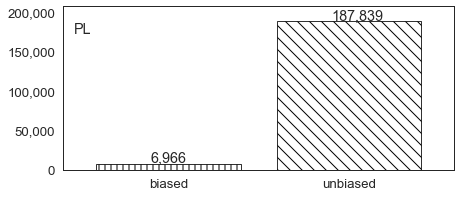

In [34]:
print('POLISH:')
analyse_labels(pl, 'PL')